In [2]:
#sample of 10 student
import pandas as pd
df = pd.read_csv('../dataset/StressLevelDataset.csv')
sample=df.head(10)
#we can also use df.sample(n=10)
print(sample)

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   
5             20           13                      1          21         3   
6              4           26                      0           6         1   
7             17            3                      1          22         4   
8             13           22                      1          12         3   
9              6            8                      0          27         4   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1    

In [43]:
##Show the missing value:


#After we use isna() function that detect the missing value it show that our dataset have no missing values 



missing_values = df.isna()

missing_counts = missing_values.sum()

rows_with_missing = df[df.isna().any(axis=1)]

print("Missing values in each column: \n",missing_counts);
#print(missing_counts);
print("\n Rows with missing values:",rows_with_missing);
#print(rows_with_missing);



Missing values in each column: 
 anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

 Rows with missing values: Empty DataFrame
Columns: [anxiety_level, self_esteem, mental_health_history, depression, headache, blood_pressure, sleep_quality, breathing_problem, noise_level, living_conditions, safety, basic_needs, academic_p

       anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000     

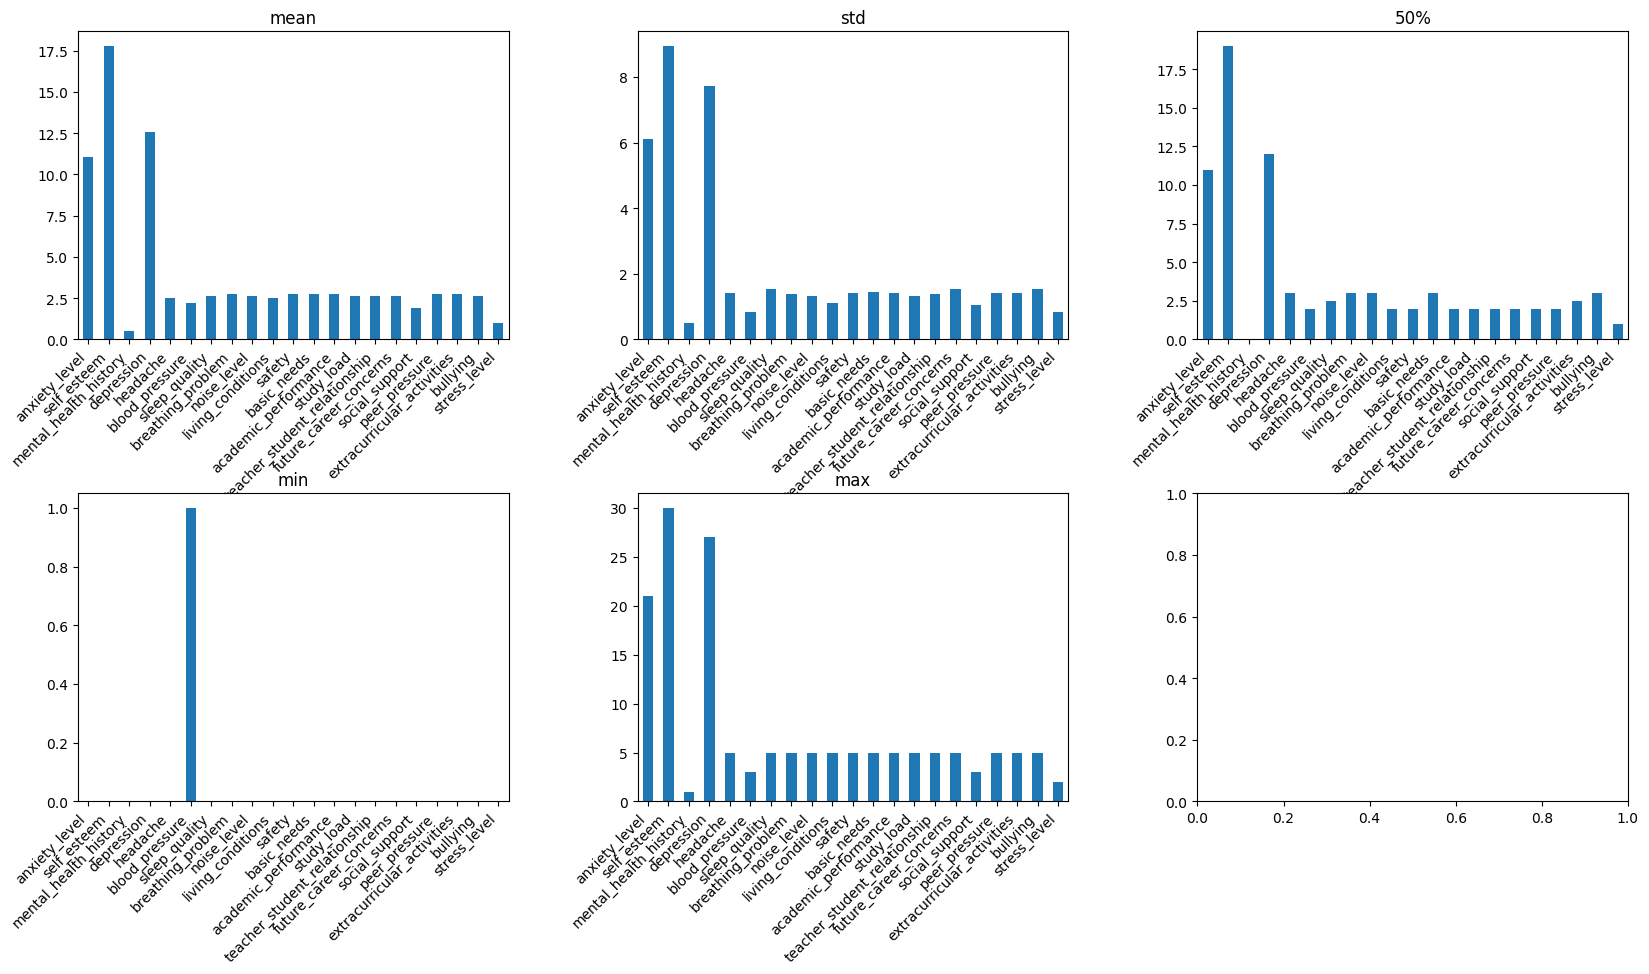

In [19]:
#statical summary 

#we use df.describe() to print the summery state for each colum and we show the result in plot char

summary_stats=df.describe()
print(summary_stats)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
stats_to_plot = ['mean', 'std', '50%', 'min', 'max']

for i, stat in enumerate(stats_to_plot):
    ax = axes.flat[i]
    summary_stats.loc[stat].plot(kind='bar', ax=ax)
    ax.set_title(stat)
    ax.set_xticklabels(summary_stats.columns, rotation=45, ha='right')



anxiety_level                   37.424518
self_esteem                     80.005852
mental_health_history            0.250175
depression                      59.706658
headache                         1.986284
blood_pressure                   0.694847
sleep_quality                    2.397489
breathing_problem                1.961998
noise_level                      1.763921
living_conditions                1.252626
safety                           1.977317
basic_needs                      2.055670
academic_performance             2.001075
study_load                       1.731280
teacher_student_relationship     1.917058
future_career_concerns           2.338989
social_support                   1.097940
peer_pressure                    2.031381
extracurricular_activities       2.009483
bullying                         2.343832
stress_level                     0.675146
dtype: float64


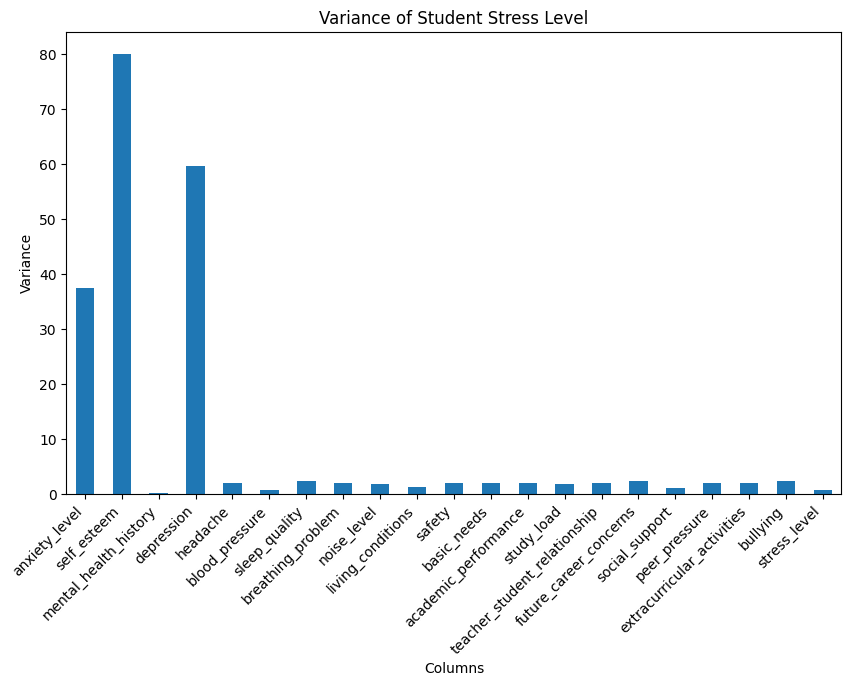

In [45]:
#Variance

# the variance show how much data points deviate from the mean,so We use .var() to calculate the variance and
#we find out that:
#self_esteem:the variance is very high so the level of dispersion and spread veryis high
#depression ,anxiety_level:the variance is high so the level of dispersion and spread is high
#mental_health_history,stress_level :the variance is very low so the level of dispersion and spread is very low
#headache,blood_pressure,Sleep quality, Breathing problem, Noise level, Living conditions, Safety, Basic needs, Academic performance, Study load, Teacher-student relationship, Future career concerns, Social support, Peer pressure, Extracurricular activities,stress_level, Bullying:the variance is  low so the level of dispersion and spread is  low               

variance= df.var(numeric_only=True);
print(variance);

# Plotting the variance
plt.figure(figsize=(10, 6))
variance.plot(kind='bar')
plt.title('Variance of Student Stress Level')
plt.ylabel('Variance')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.show()



In [ ]:
#####Graph to help you understand the relationship betwwen attributes

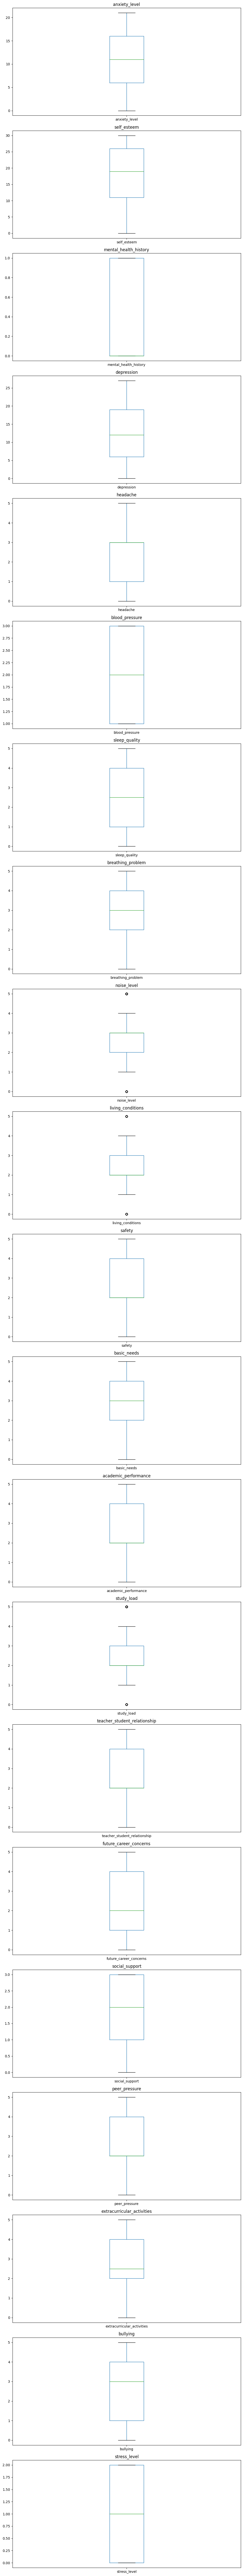

In [3]:
##Representing boxplot for each Attribute 

import matplotlib.pyplot as plt

# Filter out non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Creating a box plot for each numeric column
num_plots = len(numeric_cols)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots*5))

for i, col in enumerate(numeric_cols):
    df.boxplot(column=col, ax=axes[i], grid=False)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


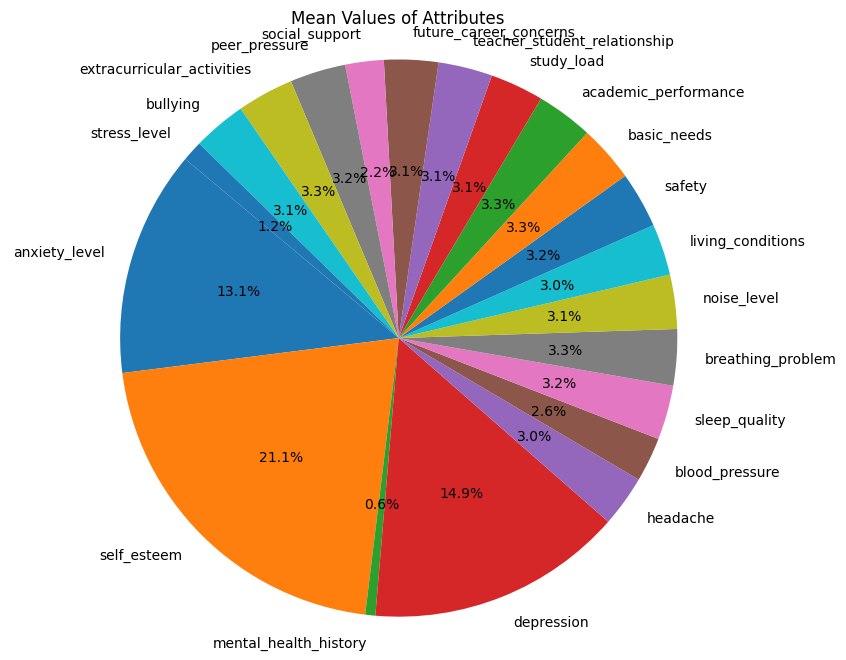

In [17]:
#The pie chart represent the mean values of attributes

column_means = df.mean()


plt.figure(figsize=(10, 8))
plt.pie(column_means, labels=column_means.index, autopct='%1.1f%%', startangle=140)
plt.title('Mean Values of Attributes')
plt.axis('equal')  
plt.show()

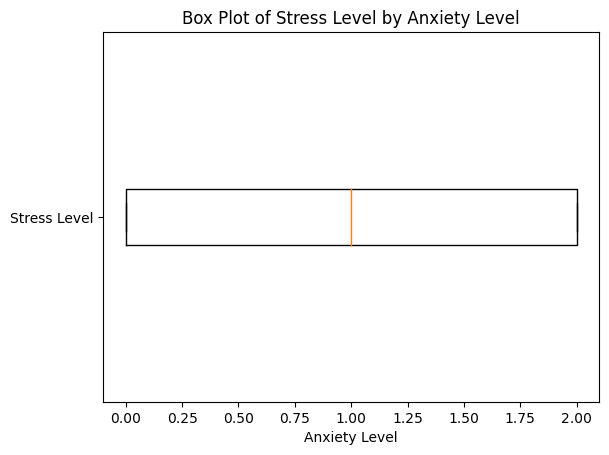

In [14]:

# Box plot that show the relation btween tress Level by Anxiety Level

anxiety_level = df['anxiety_level']
stress_level = df['stress_level']


plt.boxplot(stress_level, vert=False)
plt.yticks([1], ['Stress Level'])
plt.xlabel('Anxiety Level')
plt.title('Box Plot of Stress Level by Anxiety Level')
plt.show()

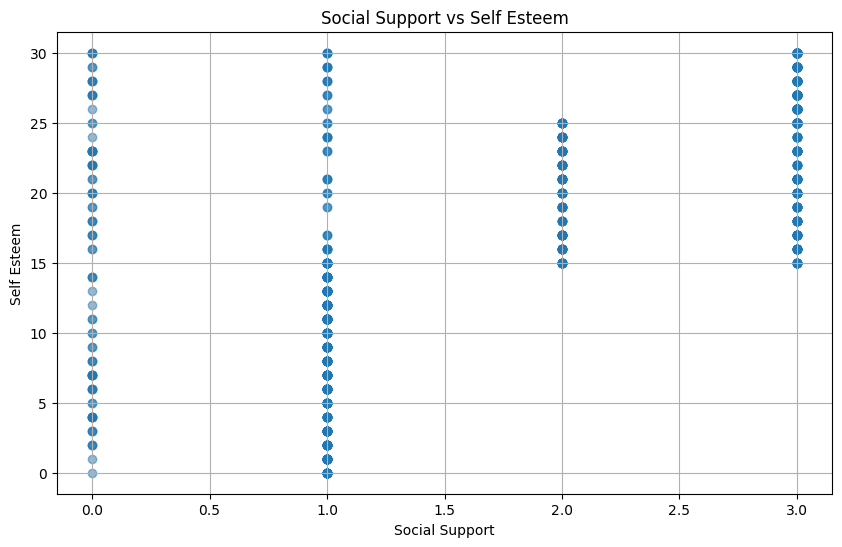

In [9]:
# Plotting showing the relation btweensocial support vs self esteem using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['social_support'], df['self_esteem'], alpha=0.5)
plt.title('Social Support vs Self Esteem')
plt.xlabel('Social Support')
plt.ylabel('Self Esteem')
plt.grid(True)
plt.show()

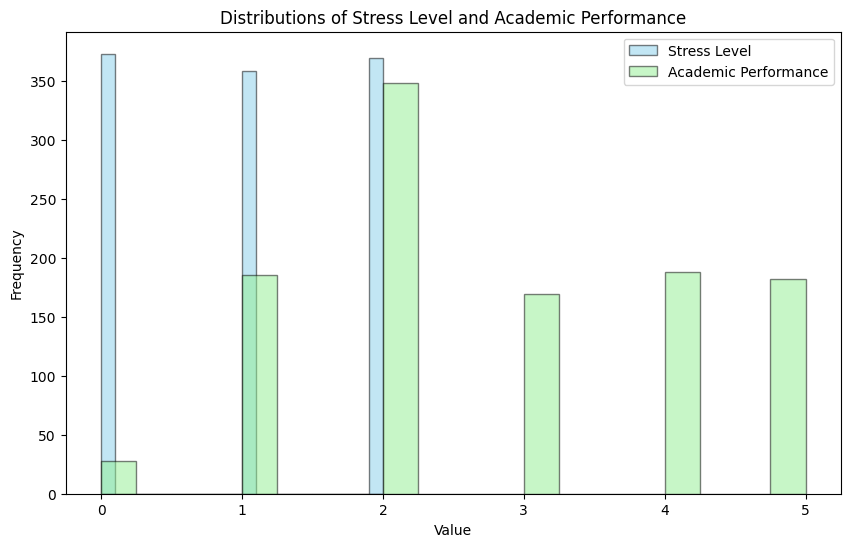

In [12]:

# Bar char represent the relation between stress level and academic performance

plt.figure(figsize=(10, 6))

# Overlaying the histograms of Stress Level and Academic Performance
plt.hist(df['stress_level'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Stress Level')
plt.hist(df['academic_performance'], bins=20, color='lightgreen', edgecolor='black', alpha=0.5, label='Academic Performance')

plt.title('Distributions of Stress Level and Academic Performance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


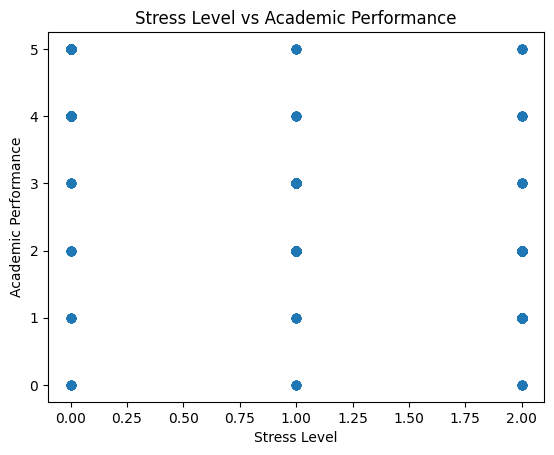

In [10]:

# Scatter plot show the relation btween stress level and academic performance 
stress_level = df['stress_level']
academic_performance = df['academic_performance']


plt.scatter(stress_level, academic_performance)
plt.xlabel('Stress Level')
plt.ylabel('Academic Performance')
plt.title('Stress Level vs Academic Performance')
plt.show()

In [46]:
#Data preproccesing

# Remove duplicates

#We calculate the number of dublicate using df.duplicated().sum() and we find that there is no dublicate in our dataset

import pandas as pd
df = pd.read_csv('../dataset/StressLevelDataset.csv')
number_of_duplicates = df.duplicated().sum()
df_cleaned = df.drop_duplicates()
print("Number of duplicate rows:", number_of_duplicates)
print("DataFrame after dropping all duplicate rows: \n ",df_cleaned)
df_cleaned.to_csv('StressLevelcleaned_dataset.csv', index=False)



Number of duplicate rows: 0
DataFrame after dropping all duplicate rows: 
        anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2                12           18                      1          14         2   
3                16           12                      1          15         4   
4                16           28                      0           7         2   
...             ...          ...                    ...         ...       ...   
1095             11           17                      0          14         3   
1096              9           12                      0           8         0   
1097              4           26                      0           3         1   
1098             21            0                      1          19         5   
1099             18            6 

In [48]:
#Missing values 
#There is no missing value
import pandas as pd
df = pd.read_csv('StressLevelcleaned_dataset.csv')


missing_values = df.isna()
missing_counts = missing_values.sum()
rows_with_missing = df[df.isna().any(axis=1)];

print("Missing values in each column: \n",missing_counts)

print("\nRows with missing values: \n",rows_with_missing)


Missing values in each column: 
 anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

Rows with missing values: 
 Empty DataFrame
Columns: [anxiety_level, self_esteem, mental_health_history, depression, headache, blood_pressure, sleep_quality, breathing_problem, noise_level, living_conditions, safety, basic_needs, academic_

In [12]:
import pandas as pd
import numpy as np

# Read the dataset
df = pd.read_csv('StressLevelcleaned_dataset.csv')

# Define a function to count outliers based on a Z-score threshold
def count_outliers(column, threshold=3):
    column_mean = column.mean()
    column_std = column.std()
    upper_bound = column_mean + threshold * column_std
    lower_bound = column_mean - threshold * column_std
    num_outliers = ((column > upper_bound) | (column < lower_bound)).sum()
    return num_outliers

# Count outliers in each column
outlier_counts = {}
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    num_outliers = count_outliers(df[column])
    outlier_counts[column] = num_outliers

# Sum the total number of outliers across all numeric columns
rows_with_outliers = sum(outlier_counts.values())

# Print the number of outliers for each column and the total
for column, count in outlier_counts.items():
    print(f"Column: {column}, Number of outliers: {count}")

print(f"Total rows with outliers: {rows_with_outliers}")

Column: anxiety_level, Number of outliers: 0
Column: self_esteem, Number of outliers: 0
Column: mental_health_history, Number of outliers: 0
Column: depression, Number of outliers: 0
Column: headache, Number of outliers: 0
Column: blood_pressure, Number of outliers: 0
Column: sleep_quality, Number of outliers: 0
Column: breathing_problem, Number of outliers: 0
Column: noise_level, Number of outliers: 0
Column: living_conditions, Number of outliers: 0
Column: safety, Number of outliers: 0
Column: basic_needs, Number of outliers: 0
Column: academic_performance, Number of outliers: 0
Column: study_load, Number of outliers: 0
Column: teacher_student_relationship, Number of outliers: 0
Column: future_career_concerns, Number of outliers: 0
Column: social_support, Number of outliers: 0
Column: peer_pressure, Number of outliers: 0
Column: extracurricular_activities, Number of outliers: 0
Column: bullying, Number of outliers: 0
Column: stress_level, Number of outliers: 0
Total rows with outlier

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the dataset
df = pd.read_csv('StressLevelDataset (1) (1).csv')

# Because there is no categorical columns in the dataset, we assuming 'mental_health_history' is a categorical column with textual data like 'yes' and 'no'

le = LabelEncoder()
df['mental_health_history'] = le.fit_transform(df['mental_health_history'])
print(df) 

      anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2                12           18                      1          14         2   
3                16           12                      1          15         4   
4                16           28                      0           7         2   
...             ...          ...                    ...         ...       ...   
1095             11           17                      0          14         3   
1096              9           12                      0           8         0   
1097              4           26                      0           3         1   
1098             21            0                      1          19         5   
1099             18            6                      1          15         3   

      blood_pressure  sleep

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # You can also use other statistical tests like chi2 for classification


# Read the dataset
df = pd.read_csv('StressLevelcleaned_dataset.csv')

# Separate features and target variable
X = df.drop(columns=['anxiety_level'])
y = df['anxiety_level']

# Apply SelectKBest algorithm with f_classif (for classification) or f_regression (for regression)
num_features_to_select = 5  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

print("Selected Features:", selected_features)


Selected Features: Index(['blood_pressure', 'sleep_quality', 'future_career_concerns', 'bullying',
       'stress_level'],
      dtype='object')


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Read the dataset
df = pd.read_csv('StressLevelcleaned_dataset.csv')
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data)

print("Scaled Data:")
print(scaled_data)


Scaled Data:
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [21]:
import pandas as pd


# Read the dataset
df = pd.read_csv('StressLevelDataset (1) (1).csv')

# The column to discretize
column_to_discretize = 'anxiety_level'
num_bins = 3 

# Discretization using the pd.cut function
df['discretized_anxiety_level'] = pd.cut(df[column_to_discretize], bins=num_bins, labels=False)

# Print the original and the discretized column
print("Original DataFrame:")
print(df[['anxiety_level', 'discretized_anxiety_level']])

Original DataFrame:
      anxiety_level  discretized_anxiety_level
0                14                          1
1                15                          2
2                12                          1
3                16                          2
4                16                          2
...             ...                        ...
1095             11                          1
1096              9                          1
1097              4                          0
1098             21                          2
1099             18                          2

[1100 rows x 2 columns]


In [10]:
import pandas as pd

# Read the dataset
df = pd.read_csv('StressLevelcleaned_dataset.csv')

# Aggregation by taking the mean of all columns grouped by 'stress_level'
aggregated_data = df.groupby('stress_level').mean()

# print the aggregated data
print(aggregated_data)

              anxiety_level  self_esteem  mental_health_history  depression  \
stress_level                                                                  
0                  5.431635    25.252011               0.101877    6.013405   
1                 11.430168    19.262570               0.488827   11.874302   
2                 16.401084     8.780488               0.891599   19.829268   

              headache  blood_pressure  sleep_quality  breathing_problem  \
stress_level                                                               
0             1.313673        2.195710       4.126005           1.697051   
1             2.460894        1.324022       2.530726           2.927374   
2             3.761518        3.000000       1.303523           3.653117   

              noise_level  living_conditions    safety  basic_needs  \
stress_level                                                          
0                1.648794           3.313673  4.099196     4.144772   
1         